<a href="https://colab.research.google.com/github/pan-emily/protein-clip/blob/main/batchwise_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
import torch

data = None
with open('emily_data (sam sulek).pkl', 'rb') as file:
  data = pickle.load(file)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')

# data_on_gpu = data.to(device)

In [3]:
data.keys()

dict_keys(['pep_seq', 'rec_seq', 'pep_emb', 'rec_emb', 'rankings'])

PCA on 256 peptide embeddings

In [4]:
data['pep_emb'].shape

torch.Size([256, 128])

In [12]:
pep_emb = data['pep_emb'].cpu().detach().numpy()
rec_emb = data['rec_emb'].cpu().detach().numpy()

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
pca = PCA(n_components = 2)
peptide_2d = pca.fit_transform(pep_emb)

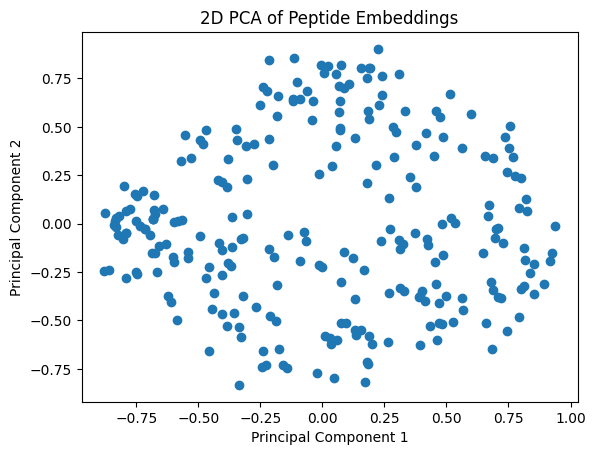

In [8]:
plt.scatter(peptide_2d[:, 0], peptide_2d[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Peptide Embeddings')
plt.show()

In [9]:
topk = data['rankings']

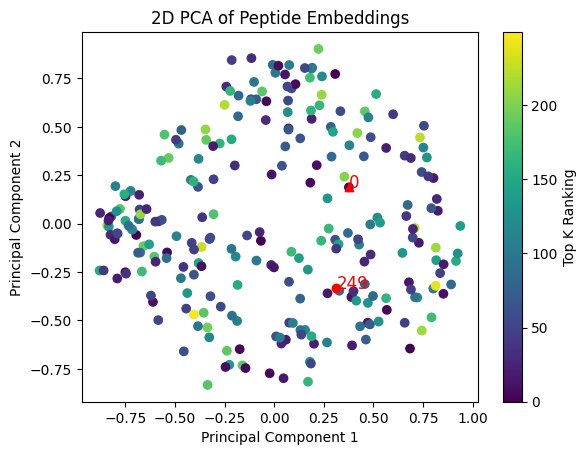

In [10]:
scatter = plt.scatter(peptide_2d[:, 0], peptide_2d[:, 1], c=topk, cmap='viridis')
plt.colorbar(scatter, label='Top K Ranking')

# find the intended peptide
plt.scatter(peptide_2d[-1][0], peptide_2d[-1][1], color='red')
plt.text(peptide_2d[-1, 0], peptide_2d[-1, 1], f'{topk[-1]}', color='red', fontsize=12)

# find the lowest ranked peptide
min_index = np.argmin(topk)
plt.scatter(peptide_2d[min_index, 0], peptide_2d[min_index, 1], color='red', marker='^')
plt.text(peptide_2d[min_index, 0], peptide_2d[min_index, 1], f'{topk[min_index]}', color='red', fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Peptide Embeddings')
plt.show()

In [13]:
cos = [np.dot(pep, rec) for pep, rec in zip(pep_emb, rec_emb)]

In [16]:
len(cos)

256

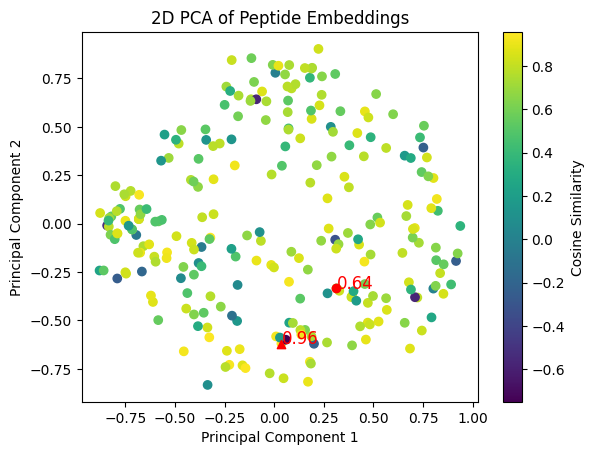

In [22]:
scatter = plt.scatter(peptide_2d[:, 0], peptide_2d[:, 1], c=cos, cmap='viridis')
plt.colorbar(scatter, label='Cosine Similarity')

# find the intended peptide
plt.scatter(peptide_2d[-1][0], peptide_2d[-1][1], color='red')
plt.text(peptide_2d[-1, 0], peptide_2d[-1, 1], f'{cos[-1]:.2f}', color='red', fontsize=12)

# find the lowest ranked peptide
min_index = np.argmax(cos)
plt.scatter(peptide_2d[min_index, 0], peptide_2d[min_index, 1], color='red', marker='^')
plt.text(peptide_2d[min_index, 0], peptide_2d[min_index, 1], f'{cos[min_index]:.2f}', color='red', fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Peptide Embeddings')
plt.show()